In [34]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [36]:
df.sample(5)

,Survived,Age,Fare
828,1,NaN,7.750
265,0,36.0,10.500
675,0,18.0,7.775
348,1,3.0,15.900
4,0,35.0,8.050


In [37]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [38]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [40]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [41]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [43]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = (X_train['Age'].dropna().sample(X_train['Age_imputed'].isnull().sum()).values)
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [45]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([23.  ,  0.83, 29.  , 15.  , 30.5 , 31.  , 30.  , 47.  , 40.  ,
       14.  , 14.  , 22.  , 23.  , 11.  , 23.  , 27.  , 28.  , 17.  ,
       28.  ,  4.  , 32.  , 22.  ,  2.  , 39.  , 27.  , 20.  , 24.  ,
       61.  , 47.  , 24.  , 44.  , 17.  , 15.  , 45.5 , 30.  , 10.  ,
        1.  , 27.  , 51.  , 29.  , 25.  , 48.  , 56.  , 35.  , 38.  ,
       48.  , 24.  , 50.  , 24.  , 37.  , 34.  , 29.  , 22.  , 35.  ,
       18.  , 33.  , 39.  ,  3.  , 36.  , 34.  , 23.  , 52.  , 23.  ,
       57.  , 28.  , 28.5 ,  0.67,  9.  , 16.  , 31.  , 28.  , 20.  ,
        0.42, 39.  , 40.  , 48.  , 33.  , 16.  , 58.  , 21.  , 19.  ,
       16.  , 23.  , 19.  , 41.  , 50.  , 45.  , 21.  , 56.  , 31.  ,
       47.  , 24.  , 24.  , 24.  , 25.  , 50.  , 64.  , 45.  , 35.  ,
       54.  , 32.  , 25.  , 26.  , 26.  , 27.  , 28.  , 36.  , 21.  ,
       23.  , 22.  ,  4.  , 41.  , 22.  , 34.  , 54.  , 40.  , 25.  ,
       28.  , 27.  , 17.  , 18.  , 36.  ,  4.  , 27.  , 52.  , 24.  ,
        6.  , 58.  ,

In [46]:
X_train['Age'].isnull().sum()

148

In [47]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,29.0
493,71.0,49.5042,71.0
527,NaN,221.7792,20.0


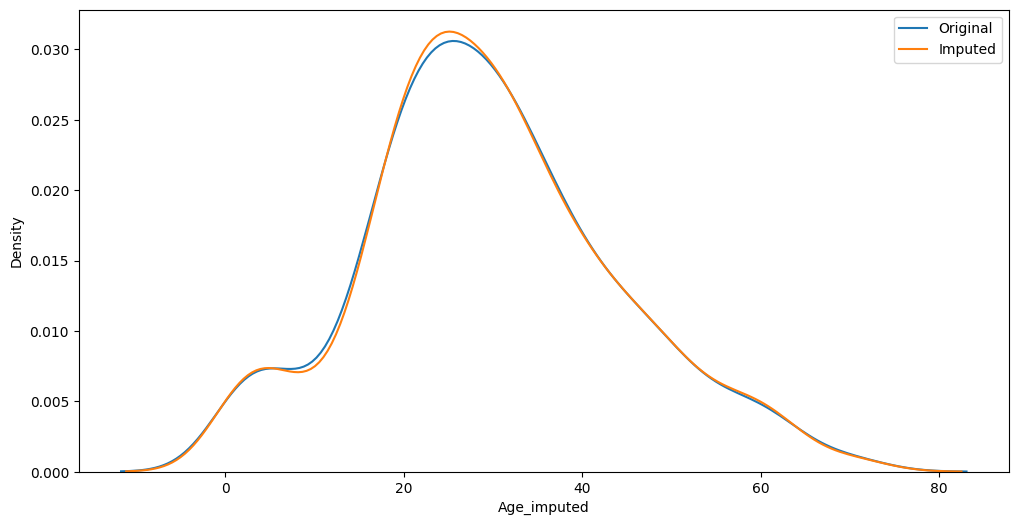

In [48]:
plt.figure(figsize=(12, 6))
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [49]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  203.76722692520426


In [50]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,65.577753
Age,71.512440,204.349513,204.349513
Age_imputed,65.577753,204.349513,203.767227


<Axes: >

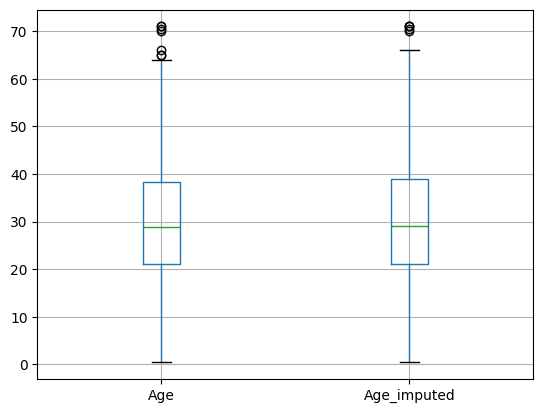

In [51]:
X_train[['Age', 'Age_imputed']].boxplot()